<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [4]:
import pandas as pd
df = pd.read_csv('https://example.com/data.csv')

HTTPError: HTTP Error 404: Not Found

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [5]:
# Ensure that you have the required libraries installed to work with SQLite and Pandas:
!pip install pandas

import pandas as pd
import sqlite3

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

# Create a SQLite database connection
conn = sqlite3.connect('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.sqlite')

# Write the DataFrame to a SQLite table named 'main'
df.to_sql('main', conn, if_exists='replace', index=False)

# Now you can run SQL queries on the 'main' table using this connectioN



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


OperationalError: unable to open database file

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [ ]:
# Read the CSV file
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

2


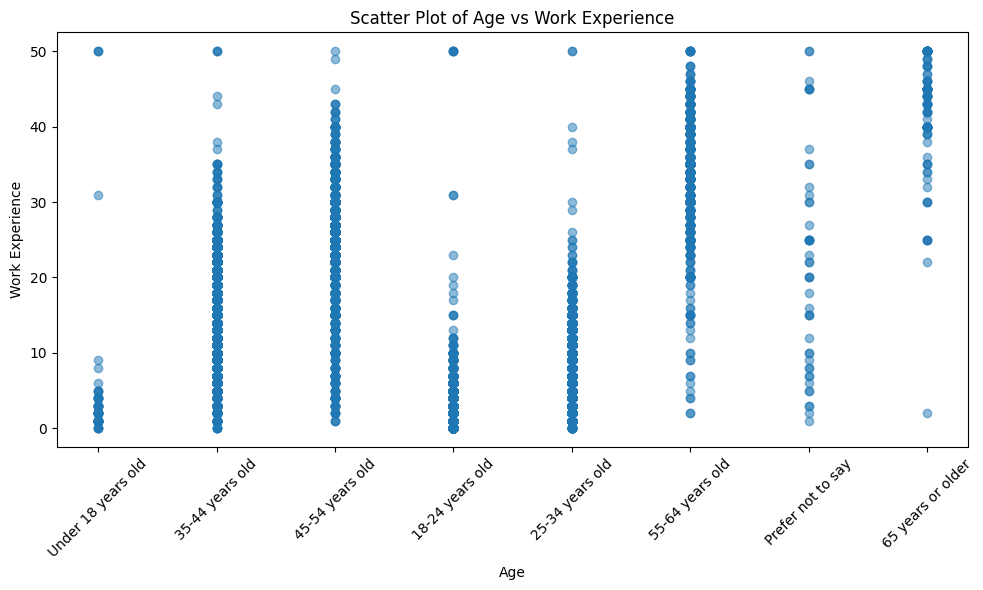

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')
comp = df['ConvertedCompYearly']
comp_clean = comp[(comp > 0) & (~comp.isna())]

plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['WorkExp'], alpha=0.5)
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()



**Box Plots**

Plot a box plot of Age.


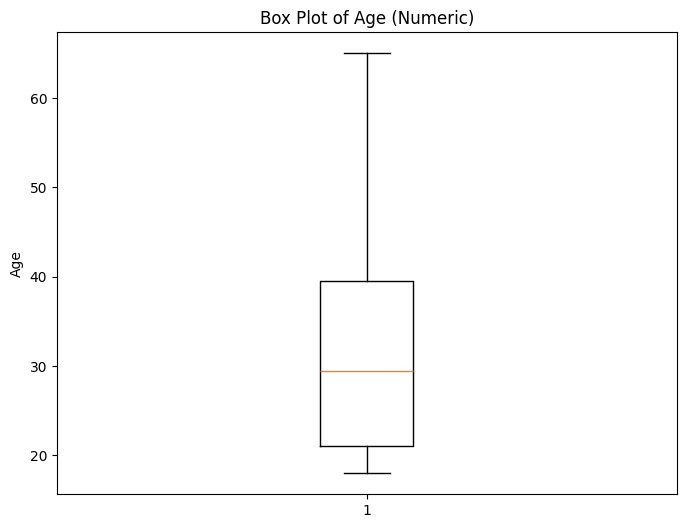

In [22]:
## Write your code here
import matplotlib.pyplot as plt

# Convert age ranges to midpoints
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return None
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18  # or another reasonable value
    elif 'older' in age_str.lower():
        return 65  # or another reasonable value
    else:
        return None

age_numeric = df['Age'].apply(age_to_midpoint).dropna()

plt.figure(figsize=(8,6))
plt.boxplot(age_numeric)
plt.title('Box Plot of Age (Numeric)')
plt.ylabel('Age')
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


Text(0, 0.5, 'Work Experience')

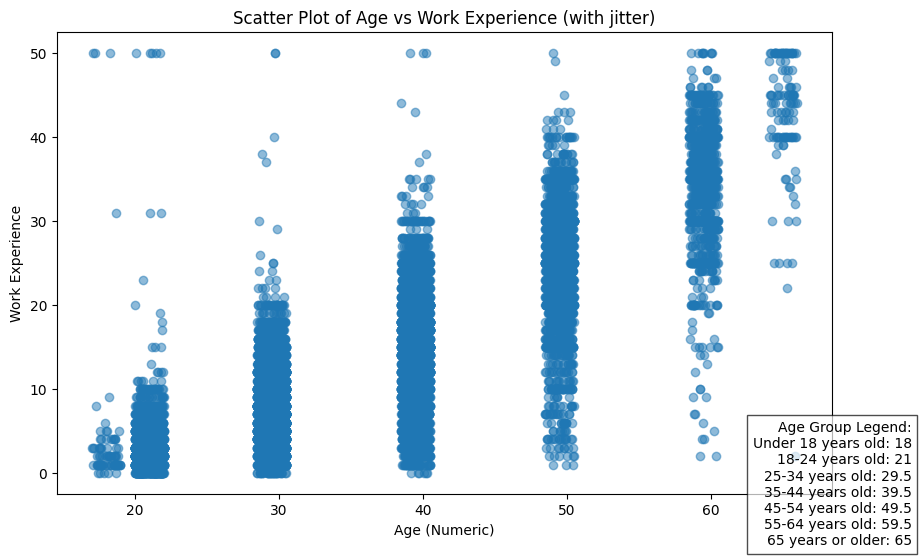

In [29]:
# Convert age ranges to midpoints for Age
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return None
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return None

# Map age group labels to midpoints for legend
age_groups = {
    "Under 18 years old": 18,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 65
}

age_numeric = df['Age'].apply(age_to_midpoint)
workexp_numeric = pd.to_numeric(df['WorkExp'], errors='coerce')

plt.figure(figsize=(10,6))
plt.scatter(age_numeric + np.random.uniform(-1, 1, size=len(age_numeric)), workexp_numeric, alpha=0.5)

# Print legend mapping in bottom right corner
legend_text = "\n".join([f"{label}: {value}" for label, value in age_groups.items()])
plt.gcf().text(0.98, 0.02, f"Age Group Legend:\n{legend_text}", fontsize=10,
               bbox=dict(facecolor='white', alpha=0.7), ha='right', va='bottom')

plt.title('Scatter Plot of Age vs Work Experience (with jitter)')
plt.xlabel('Age (Numeric)')
plt.ylabel('Work Experience')

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [32]:
# Display the columns we're trying to work with for the bubble plot
print(df[['TimeSearching', 'Frustration', 'Age']].head(10))

  TimeSearching Frustration                 Age
0           NaN         NaN  Under 18 years old
1           NaN         NaN     35-44 years old
2           NaN         NaN     45-54 years old
3           NaN         NaN     18-24 years old
4           NaN         NaN     18-24 years old
5           NaN         NaN  Under 18 years old
6           NaN         NaN     35-44 years old
7           NaN         NaN     18-24 years old
8           NaN         NaN     45-54 years old
9           NaN         NaN     35-44 years old


In [33]:
# Check how many valid rows exist for the bubble plot
valid_rows = df[['TimeSearching', 'Frustration', 'Age']].dropna()
print("Number of valid rows:", len(valid_rows))
print(valid_rows.head(10))

Number of valid rows: 28085
                 TimeSearching  \
10         30-60 minutes a day   
12         30-60 minutes a day   
15        60-120 minutes a day   
18         15-30 minutes a day   
20  Less than 15 minutes a day   
22        60-120 minutes a day   
24         15-30 minutes a day   
26         30-60 minutes a day   
31        60-120 minutes a day   
33        60-120 minutes a day   

                                          Frustration              Age  
10  Amount of technical debt;Number of software to...  35-44 years old  
12  Amount of technical debt;Complexity of tech st...  35-44 years old  
15  Amount of technical debt;Complexity of tech st...  45-54 years old  
18  Amount of technical debt;Tracking my work;Comp...  25-34 years old  
20  Number of software tools in use;Tracking my wo...  25-34 years old  
22                           Amount of technical debt  45-54 years old  
24  Amount of technical debt;Number of software to...  35-44 years old  
26           

In [37]:
#Look for unique values in the 'TimeSearching' and 'Frustration' columns
print("Unique TimeSearching values:", df['TimeSearching'].unique())
print("Unique Frustration values:", df['Frustration'].unique())
print("Top Frustration values:", df['Frustration'].value_counts().head(10))

Unique TimeSearching values: [nan '30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']
Unique Frustration values: [nan
 'Amount of technical debt;Number of software tools in use;Tracking my work;Showing my contributions'
 'Amount of technical debt;Complexity of tech stack for deployment'
 'Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build;Maintaining security of code being produced'
 'Amount of technical debt;Tracking my work;Complexity of tech stack for build;Patching/updating core components;Maintaining security of systems/platforms used in work;Reliability of tools/systems used in work'
 'Number of software tools in use;Tracking my work;Showing my contributions;Complexity of tech stack for build'
 'Amount of technical debt'
 'Amount of technical debt;Number of software tools in use'
 'None of these'
 'Amount of technical debt;Tracking my work;Showing my contributio

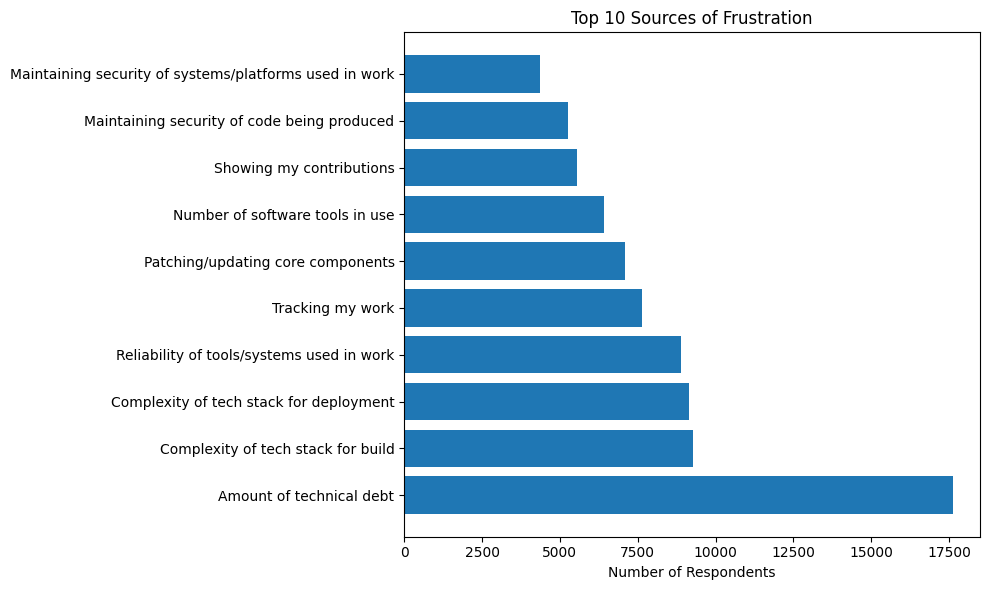

In [36]:
from collections import Counter

# Drop NaN and split semicolon-separated issues
issues = df['Frustration'].dropna().str.split(';').explode()
top_issues = Counter(issues).most_common(10)

# Prepare data for plotting
labels, counts = zip(*top_issues)

plt.figure(figsize=(10,6))
plt.barh(labels, counts)
plt.xlabel('Number of Respondents')
plt.title('Top 10 Sources of Frustration')
plt.tight_layout()
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


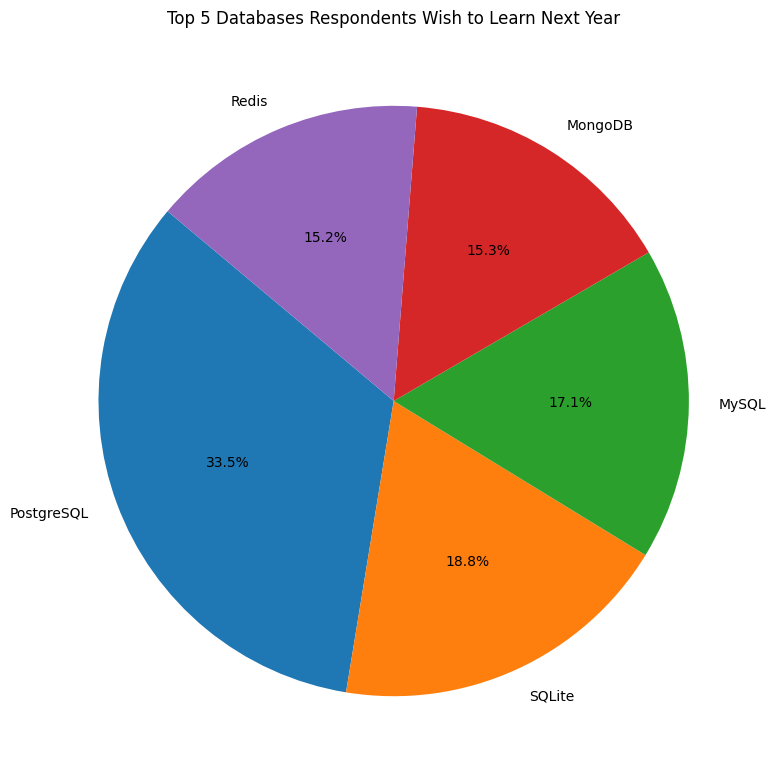

In [38]:
## Write your code here
import matplotlib.pyplot as plt
from collections import Counter

# Drop NaN and split semicolon-separated values
dbs = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode()
top_dbs = Counter(dbs).most_common(5)

# Prepare data for pie chart
labels, counts = zip(*top_dbs)

plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.tight_layout()
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


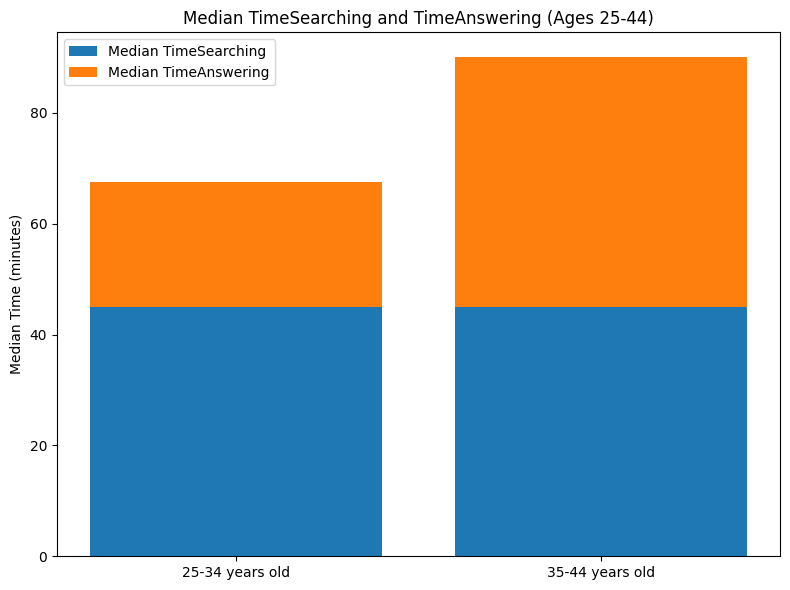

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Map categorical time ranges to numeric values (minutes)
# This allows us to calculate medians and plot them meaningfully.
time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

# Step 2: Select age groups closest to 30-35 (since no exact group exists)
age_groups = ["25-34 years old", "35-44 years old"]
medians_searching = []
medians_answering = []

# Step 3: For each age group, convert time categories to numeric and calculate median
for group in age_groups:
    subset = df[df['Age'] == group]
    # Convert categorical responses to numeric using our mapping
    searching_numeric = subset['TimeSearching'].map(time_map)
    answering_numeric = subset['TimeAnswering'].map(time_map)
    # Calculate the median for each activity
    medians_searching.append(np.nanmedian(searching_numeric))
    medians_answering.append(np.nanmedian(answering_numeric))

# Step 4: Plot stacked bar chart of the medians for each age group
plt.figure(figsize=(8,6))
plt.bar(age_groups, medians_searching, label='Median TimeSearching')
plt.bar(age_groups, medians_answering, bottom=medians_searching, label='Median TimeAnswering')
plt.ylabel('Median Time (minutes)')
plt.title('Median TimeSearching and TimeAnswering (Ages 25-44)')
plt.legend()
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [49]:
# Show all unique age group labels in the dataset
print(df['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


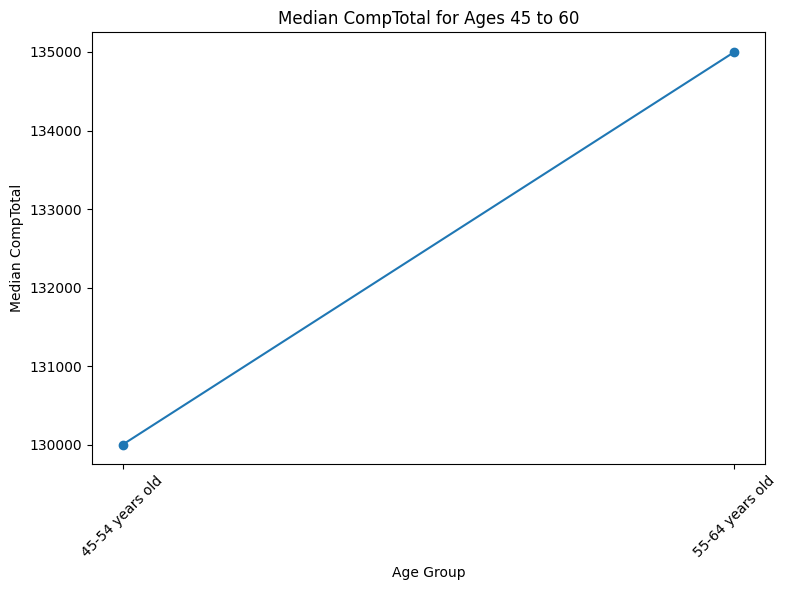

In [48]:
## Write your code here
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define a function to convert age group strings to numeric midpoints
# This helps us filter ages between 45 and 60.
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return None
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return None

# Step 2: Apply the function to create a numeric age column
df['AgeNumeric'] = df['Age'].apply(age_to_midpoint)

# Step 3: Filter rows where age is between 45 and 60
age_filtered = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

# Step 4: Group by age group and calculate the median CompTotal for each
median_comp = age_filtered.groupby('Age')['CompTotal'].median()

# Step 5: Plot the line chart
plt.figure(figsize=(8,6))
plt.plot(median_comp.index, median_comp.values, marker='o')
plt.title('Median CompTotal for Ages 45 to 60')
plt.xlabel('Age Group')
plt.ylabel('Median CompTotal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


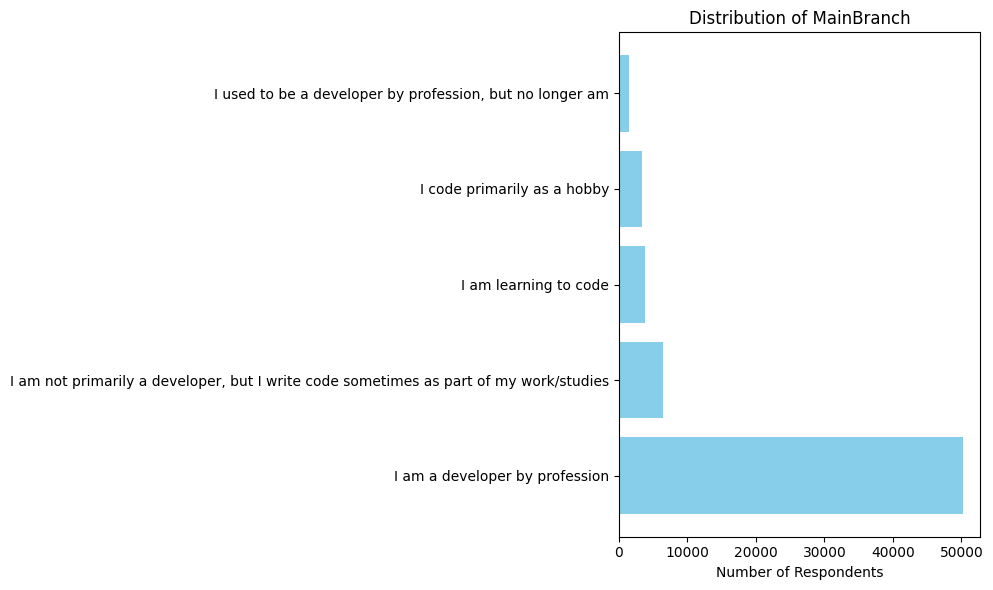

In [50]:
## Write your code here
import matplotlib.pyplot as plt

# Step 1: Count the number of respondents for each MainBranch category
mainbranch_counts = df['MainBranch'].value_counts()

# Step 2: Plot a horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(mainbranch_counts.index, mainbranch_counts.values, color='skyblue')
plt.xlabel('Number of Respondents')
plt.title('Distribution of MainBranch')
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
